In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [133]:
df =pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [134]:
print(df.shape)
df.info()

(2200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [135]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

df['label']=lb.fit_transform(df['label'])

df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [136]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [137]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [138]:
df.drop_duplicates().shape

(2200, 8)

scaling 

In [139]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline 

Pipelined =Pipeline(steps=[
    ('scale',MinMaxScaler())
])
df_scaled=Pipelined.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.head()



,N,P,K,temperature,humidity,ph,rainfall,label
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458,0.952381
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675,0.952381
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710,0.952381
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905,0.952381
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231,0.952381


Detecting outliers 


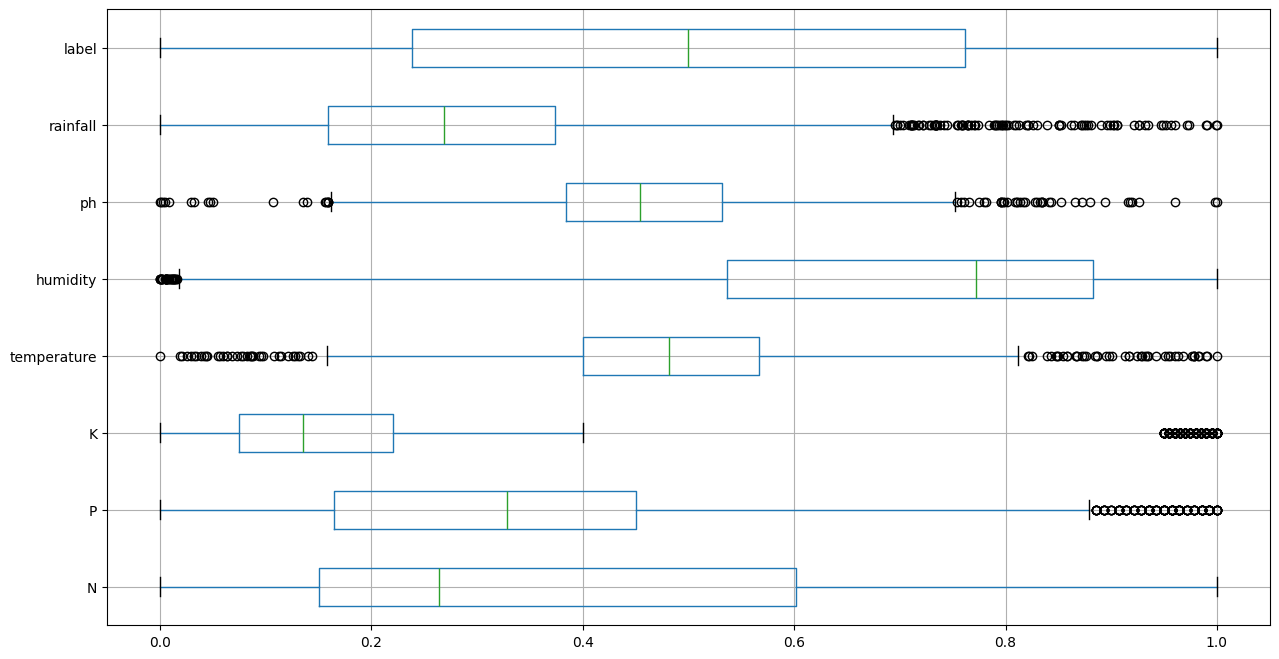

In [140]:
plt.figure(figsize=(15,8))
df_scaled.select_dtypes(include="number").boxplot(vert=False)
plt.show()

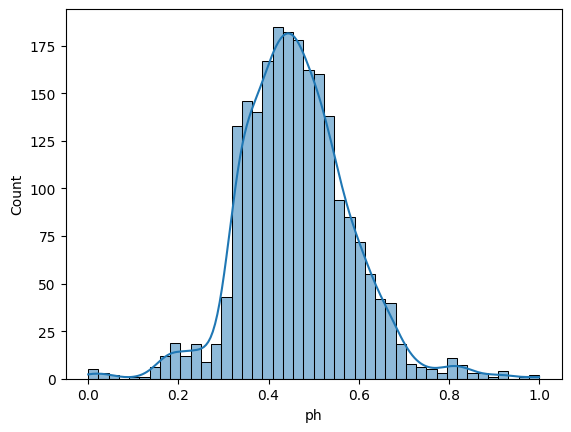

In [141]:
sns.histplot(df_scaled['ph'],kde=True)
plt.show()

Cap all columns

In [144]:
from scipy.stats.mstats import winsorize

for i in df_scaled.columns:
    df_scaled[i] =winsorize(df_scaled[i],limits=[0.10,0.10])


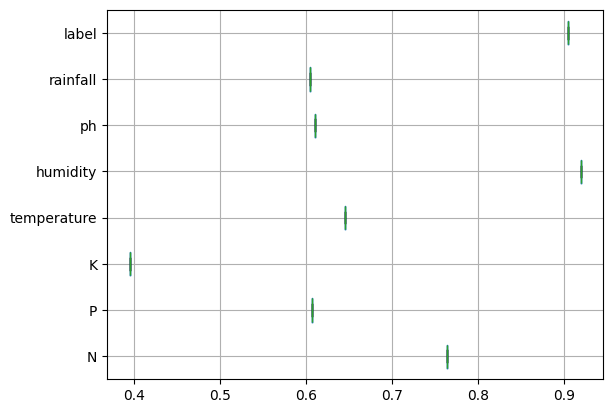

In [145]:
df_scaled.select_dtypes(include="number").boxplot(vert=False)
plt.show()